Introducción a los datos abiertos:
El open data o datos abiertos es una práctica que promueve a los gobiernos de todos el mundo a dejar los datos de registros públicos abiertos para toda la gente y disponible para su visualización y uso.
Sus principios se basan en:
1. Igual entre las administraciones
2. Públicos
3. Abiertos y estándares
4. Detallados
5. Actualizados
6. Accesibles
7. Automatizados
8. Sin registro
9. Libres

Las mayores oportunidades que ofrece este tipo de práctica es sin dudas, la optimización y la correcta utilización de recursos con los que consta un pais, sobre todo uno como Paraguay donde es casi de conocimiento público que hay malversación de fondos, nepotismo y otros males que aquejan al sector político del país. Al tener los datos abiertos al público, este puede saber que se está haciendo por parte del estado. En cuanto a la informática, el tener datos abiertos son una ventaja para los informáticos de todo tipo, se pueden descubrir desde mercado no explotados hasta malversación de fondos públicos, todo esto gracias a la ciencia de datos y la programación de distintas herramientas de software.

En Paraguay se pueden consguir datos abiertos desde
Portal de Datos Abiertos del Gobierno de Paraguay: El Gobierno de Paraguay tiene un portal de datos abiertos donde se puede encontrar una variedad de conjuntos de datos en diferentes categorías. Puedes acceder al portal en el siguiente enlace: https://www.datos.gov.py/.

Dirección General de Estadísticas, Encuestas y Censos (DGEEC): La DGEEC es la institución encargada de la producción y difusión de estadísticas oficiales en Paraguay. En su sitio web, se puede encontrar una amplia gama de datos estadísticos en diferentes áreas, como población, economía, educación, salud, entre otros. Visita su sitio web en: https://www.ine.gov.py/.

Banco Central del Paraguay (BCP): El BCP proporciona datos económicos y financieros, como indicadores macroeconómicos, balances comerciales, estadísticas monetarias y financieras. Se puede acceder a los datos en su sitio web: Banco Central del Paraguay: https://www.bcp.gov.py/.

Los set de datos elegidos son uno que recupera la cantidad de fallecimientos en el Paraguay según la causa de muerte y el rango de edad, con el nombre de sus columnas siendo autoexplicativo. Por otro lado, están las exportaciones por tipo de camino (fluvial, terrestres), junto con sus nombres y su ubicación (latitud y longitud).

In [370]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [371]:
#Obtengo los datos del csv del gobierno y los convierto en un dataframe llamado defunciones
defunciones = pd.read_csv('C:/Users/user/OneDrive/Desktop/Trabajo Practico OBD/defunciones.csv', sep=';')
defunciones.head()

,CODIGO,CAUSA DE MUERTE,TOTAL,Menos de 1 ano,De 1 a 4 anos,De 5 a 14 anos,De 15 a 19 anos,De 20 a 39 anos,De 40 a 49 anos,De 50 a 59 anos,De 60 y mas anos,IGNORADO
0,TOTAL 2018,TOTAL 2018,31.258,1.477,251,296,457,2.541,1.877,3.524,20.813,22
1,(A00-B99),Ciertas enfermedades infecciosas y par...,807.000,49,17,14,7,176,118,124,302,-
2,(C00-D48),Tumores (neoplasias),4.831,5,23,55,30,296,411,754,3.254,3
3,(D50-D89),Enfermedades de la sangre y de los org...,151.000,14,6,6,1,17,6,12,89,-
4,(E00-E90),"Enfermedades endocrinas, nutricionales...",3.031,37,12,14,2,76,135,407,2.348,-


In [372]:
#Cambio - por nan y formatear numeros y poder trabajar con ellos
defunciones.replace(' - ', 0, inplace=True)
defunciones.replace('.', '', inplace=True)

In [373]:
#Compruebo el cambio en el dataframe
defunciones

,CODIGO,CAUSA DE MUERTE,TOTAL,Menos de 1 ano,De 1 a 4 anos,De 5 a 14 anos,De 15 a 19 anos,De 20 a 39 anos,De 40 a 49 anos,De 50 a 59 anos,De 60 y mas anos,IGNORADO
0,TOTAL 2018,TOTAL 2018,31.258,1.477,251,296,457,2.541,1.877,3.524,20.813,22
1,(A00-B99),Ciertas enfermedades infecciosas y par...,807.000,49,17,14,7,176,118,124,302,0
2,(C00-D48),Tumores (neoplasias),4.831,5,23,55,30,296,411,754,3.254,3
3,(D50-D89),Enfermedades de la sangre y de los org...,151.000,14,6,6,1,17,6,12,89,0
4,(E00-E90),"Enfermedades endocrinas, nutricionales...",3.031,37,12,14,2,76,135,407,2.348,0
5,(F00-F99),Trastornos mentales y del comportamiento,318.000,0,0,0,0,30,43,69,176,0
6,(G00-G99),Enfermedades del sistema nervioso,537.000,16,18,31,27,71,37,46,291,0
7,(H00-H59),Enfermedades del ojo y sus anexos,3.000,1,1,0,0,0,0,0,1,0
8,(H60-H95),Enfermedades del oido y de la apofisis...,2.000,1,0,0,0,0,0,0,1,0
9,(I00-I99),Enfermedades del sistema circulatorio,8.599,2,5,11,8,171,336,901,7.162,3


In [374]:
#Elimino una fila no necesitada, la cual es la suma total de las defunciones por grupo de edad
defunciones.drop(defunciones.index[0], axis=0, inplace=True)

In [375]:
#Cambio el nombre de la columna para setearla de forma correcta
defunciones = defunciones.rename(columns={' IGNORADO': 'IGNORADO'})

In [376]:
#Convertir de tipo object a str para poder trabajar con los datos en forma de cadena
#Ya que el formato de números era incompatible
defunciones['Menos de 1 ano'] = defunciones['Menos de 1 ano'].astype(str)
defunciones['De 1 a 4 anos'] = defunciones['De 1 a 4 anos'].astype(str)
defunciones['De 5 a 14 anos'] = defunciones['De 5 a 14 anos'].astype(str)
defunciones['De 15 a 19 anos'] = defunciones['De 15 a 19 anos'].astype(str)
defunciones['De 20 a 39 anos'] = defunciones['De 20 a 39 anos'].astype(str)
defunciones['De 40 a 49 anos'] = defunciones['De 40 a 49 anos'].astype(str)
defunciones['De 50 a 59 anos'] = defunciones['De 50 a 59 anos'].astype(str)
defunciones['De 60 y mas anos'] = defunciones['De 60 y mas anos'].astype(str)
defunciones['IGNORADO'] = defunciones['IGNORADO'].astype(str)

In [377]:
#Comprobación de los cambios
defunciones

,CODIGO,CAUSA DE MUERTE,TOTAL,Menos de 1 ano,De 1 a 4 anos,De 5 a 14 anos,De 15 a 19 anos,De 20 a 39 anos,De 40 a 49 anos,De 50 a 59 anos,De 60 y mas anos,IGNORADO
1,(A00-B99),Ciertas enfermedades infecciosas y par...,807.000,49,17,14,7,176,118,124,302,0
2,(C00-D48),Tumores (neoplasias),4.831,5,23,55,30,296,411,754,3.254,3
3,(D50-D89),Enfermedades de la sangre y de los org...,151.000,14,6,6,1,17,6,12,89,0
4,(E00-E90),"Enfermedades endocrinas, nutricionales...",3.031,37,12,14,2,76,135,407,2.348,0
5,(F00-F99),Trastornos mentales y del comportamiento,318.000,0,0,0,0,30,43,69,176,0
6,(G00-G99),Enfermedades del sistema nervioso,537.000,16,18,31,27,71,37,46,291,0
7,(H00-H59),Enfermedades del ojo y sus anexos,3.000,1,1,0,0,0,0,0,1,0
8,(H60-H95),Enfermedades del oido y de la apofisis...,2.000,1,0,0,0,0,0,0,1,0
9,(I00-I99),Enfermedades del sistema circulatorio,8.599,2,5,11,8,171,336,901,7.162,3
10,(J00-J99),Enfermedades del sistema respiratorio,3.034,63,47,18,15,84,86,196,2.522,3


In [378]:
#Elimino columnas no necesitadas como CODIGO y TOTAL
defunciones.drop('CODIGO', axis=1, inplace=True)
defunciones.drop('TOTAL', axis=1, inplace=True)

In [379]:
#Convierto los puntos en vacio para convertirlo en números más adelante
defunciones.iloc[1:, 1:] = defunciones.iloc[1:, 1:].applymap(lambda x: x.replace('.', ''))

In [380]:
#Convertir de tipo object a integer para poder trabajar con los números
defunciones['Menos de 1 ano'] = defunciones['Menos de 1 ano'].astype(int)
defunciones['De 1 a 4 anos'] = defunciones['De 1 a 4 anos'].astype(int)
defunciones['De 5 a 14 anos'] = defunciones['De 5 a 14 anos'].astype(int)
defunciones['De 15 a 19 anos'] = defunciones['De 15 a 19 anos'].astype(int)
defunciones['De 20 a 39 anos'] = defunciones['De 20 a 39 anos'].astype(int)
defunciones['De 40 a 49 anos'] = defunciones['De 40 a 49 anos'].astype(int)
defunciones['De 50 a 59 anos'] = defunciones['De 50 a 59 anos'].astype(int)
defunciones['De 60 y mas anos'] = defunciones['De 60 y mas anos'].astype(int)
defunciones['IGNORADO'] = defunciones['IGNORADO'].astype(int)

In [381]:
#Elimino la columna total para el año 2019
defunciones = defunciones.drop(20)

In [382]:
#Comprobación de resultados
defunciones

,CAUSA DE MUERTE,Menos de 1 ano,De 1 a 4 anos,De 5 a 14 anos,De 15 a 19 anos,De 20 a 39 anos,De 40 a 49 anos,De 50 a 59 anos,De 60 y mas anos,IGNORADO
1,Ciertas enfermedades infecciosas y par...,49,17,14,7,176,118,124,302,0
2,Tumores (neoplasias),5,23,55,30,296,411,754,3254,3
3,Enfermedades de la sangre y de los org...,14,6,6,1,17,6,12,89,0
4,"Enfermedades endocrinas, nutricionales...",37,12,14,2,76,135,407,2348,0
5,Trastornos mentales y del comportamiento,0,0,0,0,30,43,69,176,0
6,Enfermedades del sistema nervioso,16,18,31,27,71,37,46,291,0
7,Enfermedades del ojo y sus anexos,1,1,0,0,0,0,0,1,0
8,Enfermedades del oido y de la apofisis...,1,0,0,0,0,0,0,1,0
9,Enfermedades del sistema circulatorio,2,5,11,8,171,336,901,7162,3
10,Enfermedades del sistema respiratorio,63,47,18,15,84,86,196,2522,3


In [383]:
#Separo las muertes de 2018 y 2019 en dos dataframes distintos
n = 19 
defunciones_2018 = defunciones[:n].copy()

defunciones_2019 = defunciones[19:].copy()

In [384]:
defunciones_2018

,CAUSA DE MUERTE,Menos de 1 ano,De 1 a 4 anos,De 5 a 14 anos,De 15 a 19 anos,De 20 a 39 anos,De 40 a 49 anos,De 50 a 59 anos,De 60 y mas anos,IGNORADO
1,Ciertas enfermedades infecciosas y par...,49,17,14,7,176,118,124,302,0
2,Tumores (neoplasias),5,23,55,30,296,411,754,3254,3
3,Enfermedades de la sangre y de los org...,14,6,6,1,17,6,12,89,0
4,"Enfermedades endocrinas, nutricionales...",37,12,14,2,76,135,407,2348,0
5,Trastornos mentales y del comportamiento,0,0,0,0,30,43,69,176,0
6,Enfermedades del sistema nervioso,16,18,31,27,71,37,46,291,0
7,Enfermedades del ojo y sus anexos,1,1,0,0,0,0,0,1,0
8,Enfermedades del oido y de la apofisis...,1,0,0,0,0,0,0,1,0
9,Enfermedades del sistema circulatorio,2,5,11,8,171,336,901,7162,3
10,Enfermedades del sistema respiratorio,63,47,18,15,84,86,196,2522,3


In [385]:
defunciones_2019

,CAUSA DE MUERTE,Menos de 1 ano,De 1 a 4 anos,De 5 a 14 anos,De 15 a 19 anos,De 20 a 39 anos,De 40 a 49 anos,De 50 a 59 anos,De 60 y mas anos,IGNORADO
21,Ciertas enfermedades infecciosas y par...,36,24,10,10,196,138,119,334,0
22,Tumores (neoplasias),0,29,53,40,323,402,830,3441,0
23,Enfermedades de la sangre y de los org...,12,7,3,3,14,7,13,88,0
24,"Enfermedades endocrinas, nutricionales...",20,15,15,7,86,149,418,2500,1
25,Trastornos mentales y del comportamiento,0,0,0,0,25,49,97,179,1
26,Enfermedades del sistema nervioso,15,22,39,43,90,29,46,303,0
27,Enfermedades del ojo y sus anexos,1,0,0,0,0,0,0,0,0
28,Enfermedades del oido y de la apofisis...,2,1,0,0,0,0,1,1,0
29,Enfermedades del sistema circulatorio,3,3,10,14,185,390,889,7283,7
30,Enfermedades del sistema respiratorio,76,54,27,19,99,116,198,2705,0


In [386]:
#Se resetean los indices para poder trabajar con los dos dataframes en conjunto mas adelante
defunciones_2018 = defunciones_2018.reset_index(drop=True)
defunciones_2019 = defunciones_2019.reset_index(drop=True)

In [387]:
#Se crea un nuevo data frame juntando ambos años para obtener el total
i = 2
defunciones_total = defunciones_2018.copy()
for i in range(defunciones.shape[1]):
    defunciones_total.iloc[:, i] = defunciones_2018.iloc[:, i] + defunciones_2019.iloc[:, i]
    
defunciones_total['CAUSA DE MUERTE'] =  pd.DataFrame({'CAUSA DE MUERTE': defunciones_2018['CAUSA DE MUERTE'].copy()})

defunciones_total

,CAUSA DE MUERTE,Menos de 1 ano,De 1 a 4 anos,De 5 a 14 anos,De 15 a 19 anos,De 20 a 39 anos,De 40 a 49 anos,De 50 a 59 anos,De 60 y mas anos,IGNORADO
0,Ciertas enfermedades infecciosas y par...,85,41,24,17,372,256,243,636,0
1,Tumores (neoplasias),5,52,108,70,619,813,1584,6695,3
2,Enfermedades de la sangre y de los org...,26,13,9,4,31,13,25,177,0
3,"Enfermedades endocrinas, nutricionales...",57,27,29,9,162,284,825,4848,1
4,Trastornos mentales y del comportamiento,0,0,0,0,55,92,166,355,1
5,Enfermedades del sistema nervioso,31,40,70,70,161,66,92,594,0
6,Enfermedades del ojo y sus anexos,2,1,0,0,0,0,0,1,0
7,Enfermedades del oido y de la apofisis...,3,1,0,0,0,0,1,2,0
8,Enfermedades del sistema circulatorio,5,8,21,22,356,726,1790,14445,10
9,Enfermedades del sistema respiratorio,139,101,45,34,183,202,394,5227,3


In [388]:
#Se crean dfs con la media de muertes por edad y por tipo de causa
data = {}
#media
for columna in defunciones_total.iloc[:, 1:]:
    data[columna] = defunciones_total[columna].mean()
    
media_muertes_por_edad = pd.DataFrame(data, index=[0])

medias_filas = []
for indice, fila in defunciones_total.iloc[0:, 1:].iterrows():
    media_fila = fila.mean()
    medias_filas.append(media_fila)

media_muertes_por_causa =  pd.DataFrame({'CAUSA DE MUERTE': defunciones_2018['CAUSA DE MUERTE'].copy()})
media_muertes_por_causa['Media'] = pd.DataFrame(medias_filas)

In [389]:
#Comprobación del resultado
media_muertes_por_causa

,CAUSA DE MUERTE,Media
0,Ciertas enfermedades infecciosas y par...,186.000000
1,Tumores (neoplasias),1105.444444
2,Enfermedades de la sangre y de los org...,33.111111
3,"Enfermedades endocrinas, nutricionales...",693.555556
4,Trastornos mentales y del comportamiento,74.333333
5,Enfermedades del sistema nervioso,124.888889
6,Enfermedades del ojo y sus anexos,0.444444
7,Enfermedades del oido y de la apofisis...,0.777778
8,Enfermedades del sistema circulatorio,1931.444444
9,Enfermedades del sistema respiratorio,703.111111


In [390]:
#Se obtiene la media truncada por edad para comprobar cual es la media real evitando los picos de muertes
data = {}

# Ignorar la primera columna
columnas = defunciones_total.columns[1:]

# Calcular la media truncada de cada columna y guardar los valores en un diccionario
media_truncada = {}
for columna in columnas:
    media_truncada[columna] = trim_mean(defunciones_total[columna], 0.2)

media_truncada_por_edad = pd.DataFrame(media_truncada, index=[0])

In [391]:
#Se obtiene la suma del total de muertes del año 2019
for columna in defunciones_total.iloc[:, 1:]:
    data[columna] = defunciones_2018[columna].sum()
    
total_2018 = pd.DataFrame(data, index=[0])

for columna in defunciones_total.iloc[:, 1:]:
    data[columna] = defunciones_2019[columna].sum()
    
total_2019 = pd.DataFrame(data, index=[0])

total_2019

,Menos de 1 ano,De 1 a 4 anos,De 5 a 14 anos,De 15 a 19 anos,De 20 a 39 anos,De 40 a 49 anos,De 50 a 59 anos,De 60 y mas anos,IGNORADO
0,1308,283,310,520,2818,1990,3624,21488,21


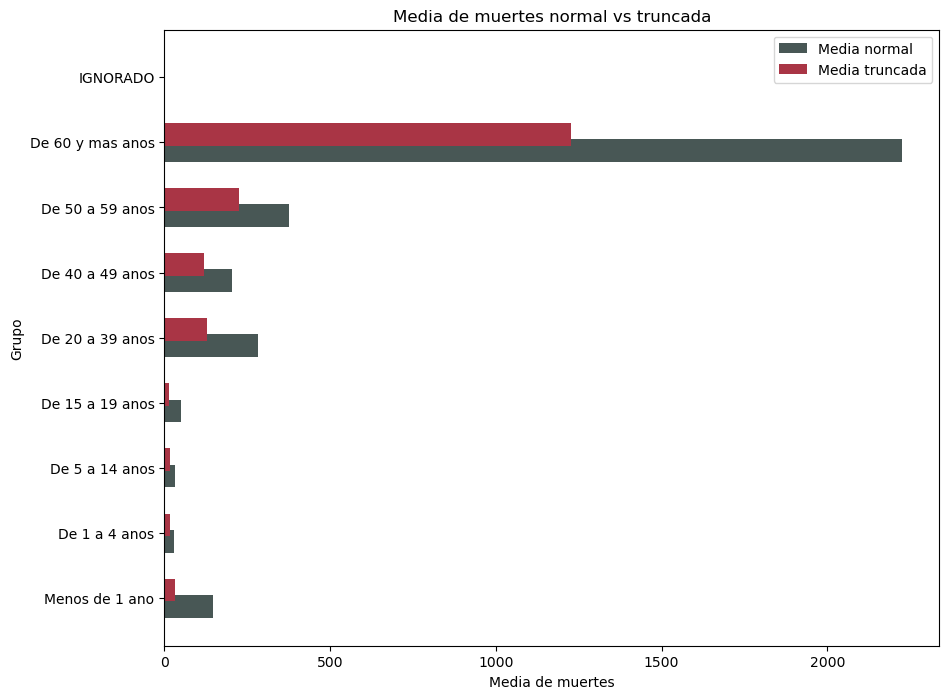

In [464]:
#Creo un gráfico de barras para ver la comparación entre la media estadística y la media truncada 
#para observar la diferencia de conllevan estas dos medidas estadísticas
# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(10,8))

# Ancho de las barras
bar_height = 0.35

# Posición de los grupos en el eje x
bar_positions1 = np.arange(len(media_muertes_por_edad.columns))
bar_positions2 = bar_positions1 + bar_width

# Graficar las barras del DataFrame 1
ax.barh(bar_positions1, media_muertes_por_edad.values.flatten(), height=bar_height, label='Media normal', color='#485755')

# Graficar las barras del DataFrame 2
ax.barh(bar_positions2, media_truncada_por_edad.values.flatten(), height=bar_height, label='Media truncada', color='#a93545')

# Etiquetas de los grupos en el eje x
ax.set_yticks(bar_positions1 + bar_width / 2)
ax.set_yticklabels(media_muertes_por_edad.columns)

# Leyenda
ax.legend()

# Título y etiquetas de los ejes
ax.set_title('Media de muertes normal vs truncada')
ax.set_ylabel('Grupo')
ax.set_xlabel('Media de muertes')

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()


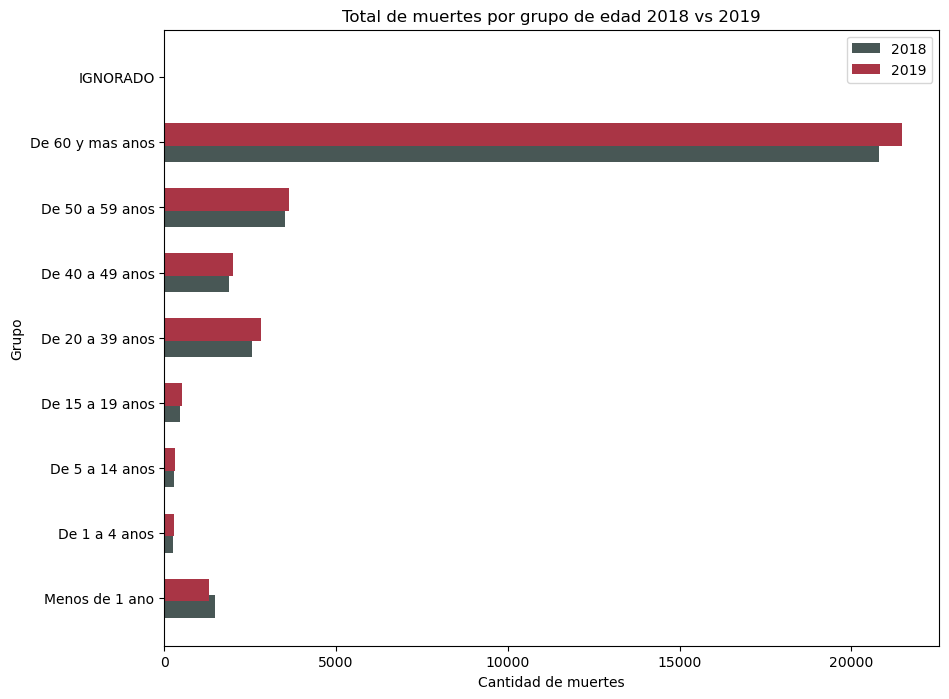

In [463]:
#El gráfico de barras muestra total de muertes por grupo de edad durante 2018 y 2019 para comprobar que
#tanto varían los resultados de un año a otro
# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(10,8))

# Ancho de las barras
bar_height = 0.35

# Posición de los grupos en el eje x
bar_positions1 = np.arange(len(total_2018.columns))
bar_positions2 = bar_positions1 + bar_width

# Graficar las barras del DataFrame 1
ax.barh(bar_positions1, total_2018.values.flatten(), height=bar_height, label='2018', color='#485755')

# Graficar las barras del DataFrame 2
ax.barh(bar_positions2, total_2019.values.flatten(), height=bar_height, label='2019', color='#a93545')

# Etiquetas de los grupos en el eje x
ax.set_yticks(bar_positions1 + bar_width / 2)
ax.set_yticklabels(media_muertes_por_edad.columns)

# Leyenda
ax.legend()

# Título y etiquetas de los ejes
ax.set_title('Total de muertes por grupo de edad 2018 vs 2019')
ax.set_ylabel('Grupo')
ax.set_xlabel('Cantidad de muertes')

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()

In [394]:
# Interpolación lineal para predecir las muertes en 2020
total_2020 = total_2018.copy()
total_2020 = total_2019
total_2020 = total_2018 + (total_2019 - total_2018) / 2

total_2020.values

array([[ 1392.5,   267. ,   303. ,   488.5,  2679.5,  1933.5,  3574. ,
        21150.5,    21.5]])

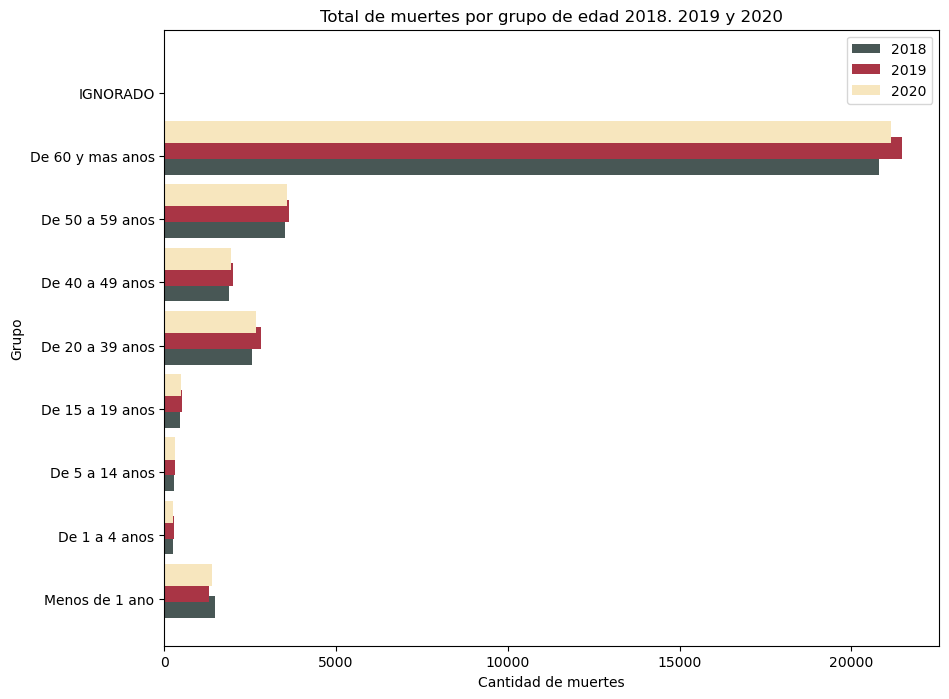

In [462]:
#Este gráfico muestra las muertes pronósticadas durante el año 2020 solo utilizando los datos que se tienen
#e ignorando los datos reales del año 2020
# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(10,8))

# Ancho de las barras
bar_height = 0.35

# Posición de los grupos en el eje x
bar_positions1 = np.arange(len(total_2018.columns)) 
bar_positions2 = bar_positions1 + bar_width
bar_positions3 = bar_positions2 + bar_width
# Graficar las barras del DataFrame 1
ax.barh(bar_positions1, total_2018.values.flatten(), height=bar_height, label='2018', color='#485755')

# Graficar las barras del DataFrame 2
ax.barh(bar_positions2, total_2019.values.flatten(), height=bar_height, label='2019', color='#a93545')

ax.barh(bar_positions3, total_2020.values.flatten(), height=bar_height, label='2020',color='#f7e6be')

# Etiquetas de los grupos en el eje x
ax.set_yticks(bar_positions1 + bar_width / 2)
ax.set_yticklabels(media_muertes_por_edad.columns)

# Leyenda
ax.legend()

# Título y etiquetas de los ejes
ax.set_title('Total de muertes por grupo de edad 2018. 2019 y 2020')
ax.set_ylabel('Grupo')
ax.set_xlabel('Cantidad de muertes')

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()

([<matplotlib.patches.Wedge at 0x234103a5e50>,
 [Text(-0.8324649911428301, 0.7190285380439136, '        Enfermedades del sistema circulatorio'),
  Text(-0.8841043022470558, -0.6544918507882637, '        Tumores (neoplasias)'),
  Text(-0.11548542759982644, -1.0939209825266565, '        Causas externas de morbilidad y mortalidad '),
  Text(0.569668707023895, -0.9409981744072217, '        Enfermedades del sistema respiratorio'),
  Text(1.0107043206041633, -0.43413912091871765, '        Enfermedades endocrinas, nutricionales y metabolicas'),
  Text(0.8147884159996107, 0.7389992132288407, 'Otros')],
 [Text(-0.45407181335063457, 0.3921973843875892, '27.3%'),
  Text(-0.48223871031657584, -0.3569955549754165, '15.6%'),
  Text(-0.06299205141808714, -0.5966841722872671, '10.7%'),
  Text(0.31072838564939725, -0.5132717314948481, '9.9%'),
  Text(0.551293265784089, -0.23680315686475506, '9.8%'),
  Text(0.4444300450906967, 0.40309047994300395, '26.6%')])

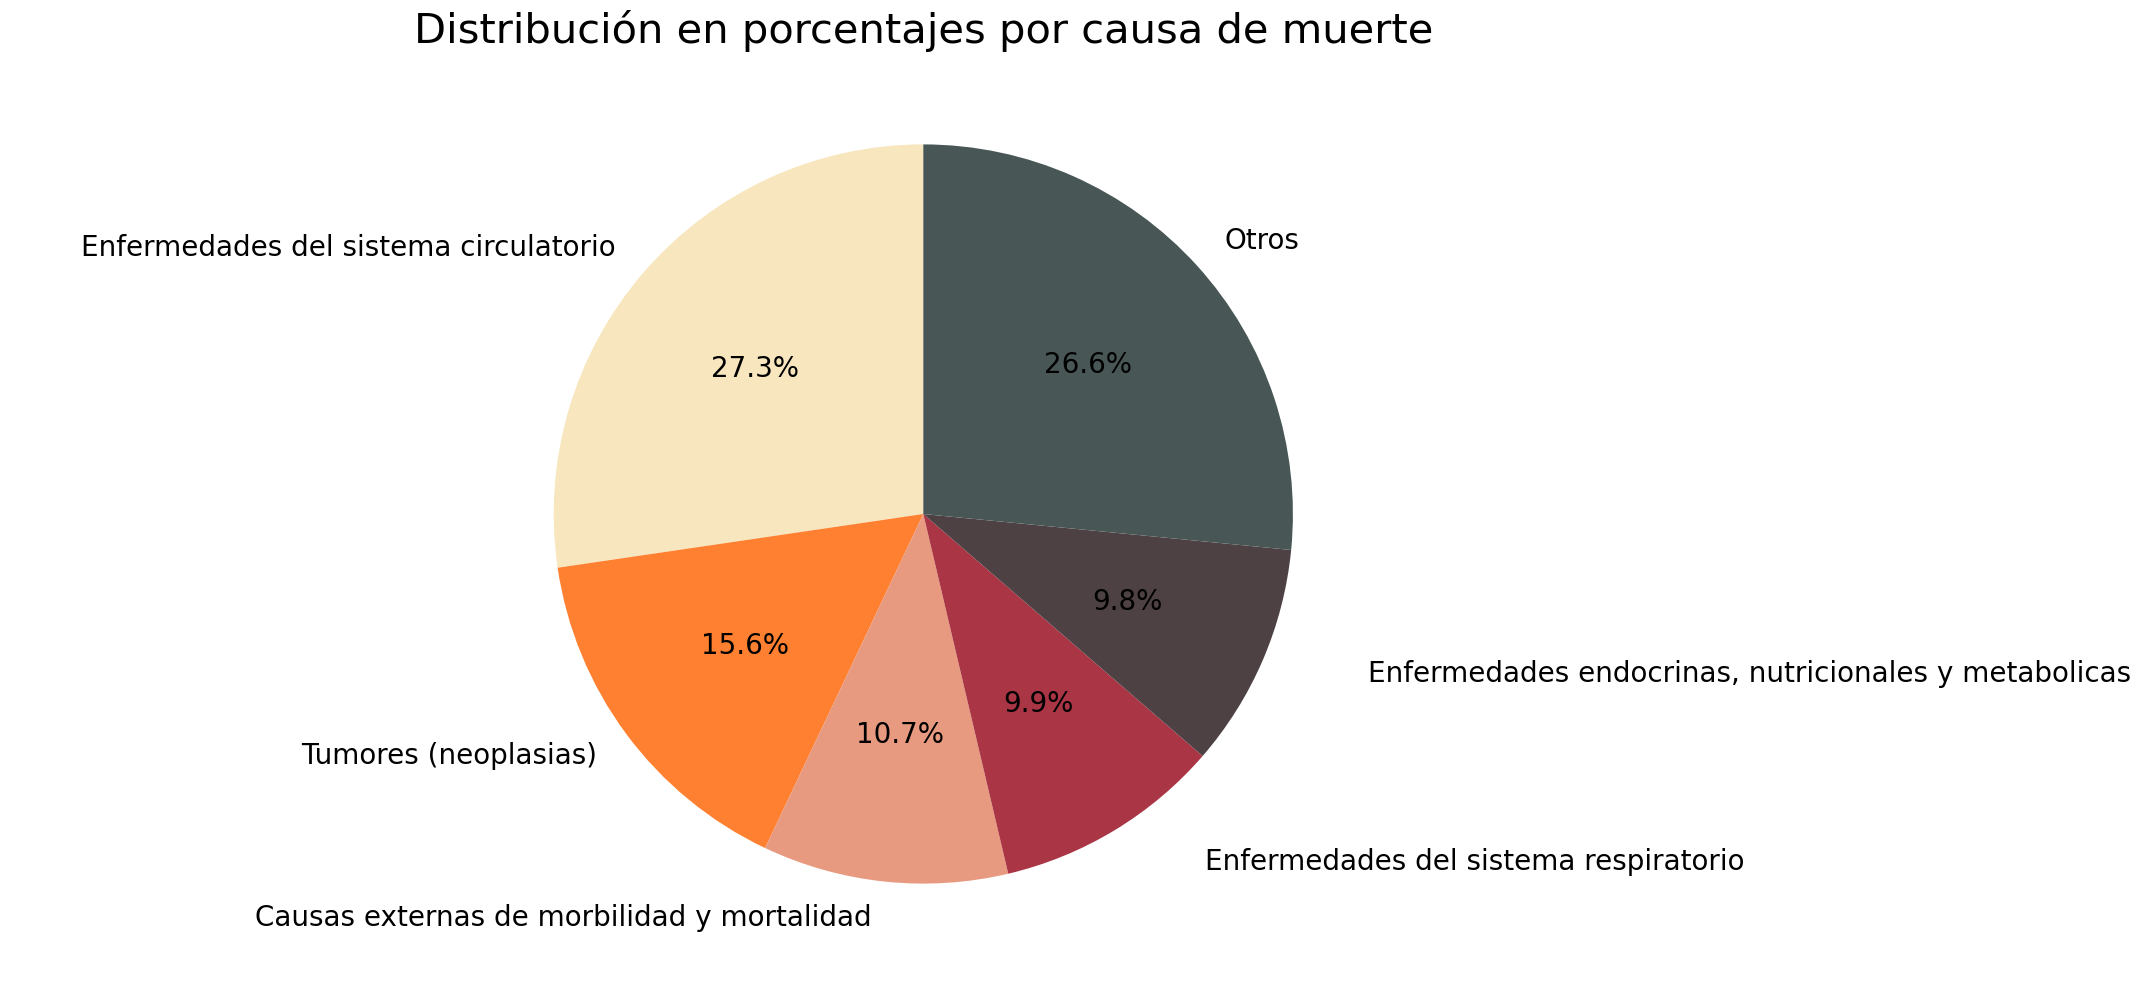

In [472]:
#Este gráfico muestra la distribución en porcentajes según la causa de muerte, englobando los menos 
#en cuanto a cifras en una categoría llamada otros

# Ordenar el DataFrame por el valor de Media en orden descendente
df = media_muertes_por_causa.sort_values(by='Media', ascending=False)

# Obtener los cinco valores más grandes
top_5 = df.head(5)

# Sumar el valor de Media de los valores restantes y crear una nueva fila "Otros"
otros = pd.DataFrame({
    'CAUSA DE MUERTE': ['Otros'],
    'Media': [df['Media'][5:].sum()]
})

# Concatenar los DataFrames top_5 y otros
df_combined = pd.concat([top_5, otros])

# Etiquetas para el gráfico
labels = df_combined['CAUSA DE MUERTE']
sizes = df_combined['Media']

# Colores para el gráfico
colors = ['#f7e6be', '#ff8030', '#e89a80', '#a93545', '#4d4143', '#485755']

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(14,12))
ax.set_title('Distribución en porcentajes por causa de muerte', fontsize=30)
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})

In [494]:
#Para hallar los intervalos de confianza
from scipy import stats
# Definir el nivel de confianza deseado (por ejemplo, 95%)
confidence_level = 0.95

# Realizar el cálculo del intervalo de confianza para cada grupo de edad
age_groups = defunciones.columns[1:]  # Obtener las columnas correspondientes a los grupos de edad

for age_group in age_groups:
    sample = defunciones[age_group].values  # Obtener los datos de la columna actual
    
    mean = np.mean(sample)  # Calcular la media
    std_dev = np.std(sample)  # Calcular la desviación estándar
    sample_size = len(sample)  # Obtener el tamaño de la muestra
    
    std_error = std_dev / np.sqrt(sample_size)  # Calcular el error estándar
    
    t_value = stats.t.ppf((1 + confidence_level) / 2, sample_size - 1)  # Obtener el valor crítico de la distribución t de Student
    
    margin_of_error = t_value * std_error  # Calcular el margen de error
    
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)  # Calcular el intervalo de confianza
    
    # Imprimir el resultado
    print(f"Intervalo de confianza para {age_group}: {confidence_interval}")
    
    
print("El intevalo de confianza significa que al sacar una media estadística, mientras los valores oscilen entre 16 y 132 para el caso de menos de un año esta media se mantiene correcta")

Intervalo de confianza para Menos de 1 ano: (15.454316098412761, 131.12463127000828)
Intervalo de confianza para De 1 a 4 anos: (8.397630129071251, 19.707633028823487)
Intervalo de confianza para De 5 a 14 anos: (7.9428630265015645, 23.951873815603697)
Intervalo de confianza para De 15 a 19 anos: (2.3898708386113654, 49.03118179296758)
Intervalo de confianza para De 20 a 39 anos: (44.457803301488354, 237.594828277459)
Intervalo de confianza para De 40 a 49 anos: (58.71282113331955, 144.81349465615412)
Intervalo de confianza para De 50 a 59 anos: (103.50041358945936, 272.7101127263301)
Intervalo de confianza para De 60 y mas anos: (536.6998429678242, 1689.6685780848075)
Intervalo de confianza para IGNORADO: (0.4115655436732333, 1.8515923510636088)
El intevalo de confianza significa que al sacar una media estadística, mientras los valores oscilen entre 16 y 132 para el caso de menos de un año esta media se mantiene correcta


In [437]:
transportes = pd.read_csv('C:/Users/user/OneDrive/Desktop/Trabajo Practico OBD/transporte.csv', sep=';')
transportes

,PUERTOS,LATITUD,LONGITUD,GRUPO DE PRODUCTOS,TOTAL,FLUVIAL,TERRESTRE
0,Ciudad del Este,-23.442503,-58.443832,"CEREALES, LEGUMBRES Y DERIVADOS",3384.2,0.0,3384.2
1,Encarnacion,-27.333330,-55.900000,"CEREALES, LEGUMBRES Y DERIVADOS",2113.9,2113.9,0.0
2,Pedro J. Caballero,-22.547220,-55.733330,"CEREALES, LEGUMBRES Y DERIVADOS",51.5,0.0,51.5
3,Salto del Guaira,-24.070951,-54.532807,"CEREALES, LEGUMBRES Y DERIVADOS",704.3,0.0,704.3
4,Ciudad del Este,-23.442503,-58.443832,"MADERA Y PRODUCTOS DE LA MADERA, PAPEL Y CARTON",41169.9,0.0,41169.9
5,Encarnacion,-27.333330,-55.900000,"MADERA Y PRODUCTOS DE LA MADERA, PAPEL Y CARTON",4275.8,4275.8,0.0
6,Jose Falcon,-25.250000,-57.716667,"MADERA Y PRODUCTOS DE LA MADERA, PAPEL Y CARTON",76385.7,0.0,76385.7
7,Pedro J. Caballero,-22.547220,-55.733330,"MADERA Y PRODUCTOS DE LA MADERA, PAPEL Y CARTON",1293.5,0.0,1293.5
8,Salto del Guaira,-24.070951,-54.532807,"MADERA Y PRODUCTOS DE LA MADERA, PAPEL Y CARTON",822.1,0.0,822.1
9,Ciudad del Este,-23.442503,-58.443832,ARTICULOS ALIMENTICIOS,82232.5,0.0,82232.5


In [427]:
transportes.dtypes

PUERTOS                object
LATITUD               float64
LONGITUD              float64
GRUPO DE PRODUCTOS     object
TOTAL                 float64
FLUVIAL               float64
TERRESTRE             float64
dtype: object

In [428]:
transportes_puertos = transportes[['TOTAL', 'PUERTOS', 'LATITUD', 'LONGITUD']]

In [433]:
# Crear el nuevo DataFrame con la suma de total, latitud y longitud por puertos
df_total_por_puertos = transportes.groupby('PUERTOS').agg({'TOTAL': 'sum', 'LATITUD': 'first', 'LONGITUD': 'first'}).reset_index()

# Verificar el nuevo DataFrame
df_total_por_puertos

,PUERTOS,TOTAL,LATITUD,LONGITUD
0,Chaco`i,42804.6,-25.250760,-57.657164
1,Ciudad del Este,592763.9,-23.442503,-58.443832
2,Encarnacion,53365.8,-27.333330,-55.900000
3,Jose Falcon,703513.8,-25.250000,-57.716667
4,Pedro J. Caballero,114443.9,-22.547220,-55.733330
5,Salto del Guaira,251176.8,-24.070951,-54.532807
6,Villeta,1477.0,-25.501999,-57.567965


In [488]:
#El siguiente es un mapa interactivo que muestra la suma del total de exportaciones por puerto
#Con sus respectivos puntos ubicados en el mapa

import folium

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[-23.442503, -58.443832], zoom_start=6)

# Iterar sobre cada fila del DataFrame
for index, row in df_total_por_puertos.iterrows():
    # Obtener las coordenadas del puerto
    latitud = row['LATITUD']
    longitud = row['LONGITUD']
    
    # Obtener la cantidad total
    total = row['TOTAL']
    
    # Crear un marcador en el mapa para el puerto
    folium.Marker(
        location=[latitud, longitud],
        popup=f'Puerto: {row["PUERTOS"]}<br>Total en toneladas: {total}',
        icon=folium.Icon(color='red')
    ).add_to(mapa)

# Mostrar el mapa interactivo
mapa

In [443]:
# Calcular la media del total agrupado por puertos
df_media = transportes.groupby('PUERTOS')['TOTAL'].mean().reset_index()

# Agregar las columnas "Latitud" y "Longitud" al DataFrame df_media
df_media = df_media.merge(transportes[['PUERTOS', 'LATITUD', 'LONGITUD']].drop_duplicates(), on='PUERTOS')

# Verificar el nuevo DataFrame con la media del total agrupada por puertos y las columnas de latitud y longitud
df_media

,PUERTOS,TOTAL,LATITUD,LONGITUD
0,Chaco`i,42804.600000,-25.250760,-57.657164
1,Ciudad del Este,65862.655556,-23.442503,-58.443832
2,Encarnacion,5929.533333,-27.333330,-55.900000
3,Encarnacion,5929.533333,-27.333000,-55.900000
4,Jose Falcon,87939.225000,-25.250000,-57.716667
5,Pedro J. Caballero,12715.988889,-22.547220,-55.733330
6,Salto del Guaira,27908.533333,-24.070951,-54.532807
7,Villeta,1477.000000,-25.501999,-57.567965


In [487]:
#El siguiente es un mapa interactivo que muestra la media de exportaciones por puerto
#Con sus respectivos puntos ubicados en el mapa

import folium

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[-23.442503, -58.443832], zoom_start=6)

# Iterar sobre cada fila del DataFrame
for index, row in df_media.iterrows():
    # Obtener las coordenadas del puerto
    latitud = row['LATITUD']
    longitud = row['LONGITUD']
    
    # Obtener la cantidad total
    total = row['TOTAL']
    
    # Crear un marcador en el mapa para el puerto
    folium.Marker(
        location=[latitud, longitud],
        popup=f'Puerto: {row["PUERTOS"]}<br>Total: {total}',
        icon=folium.Icon(color='blue')
    ).add_to(mapa)

# Mostrar el mapa interactivo
mapa

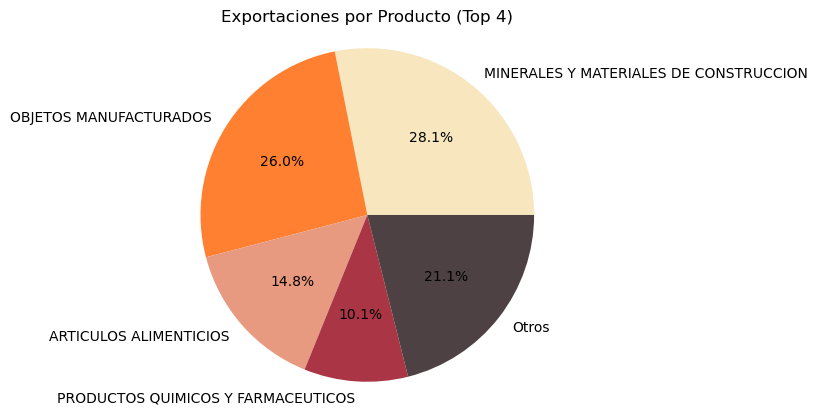

In [484]:
# Calcula la suma de exportaciones agrupadas por producto
grouped = transportes.groupby('GRUPO DE PRODUCTOS')['TOTAL'].sum()

# Definir los colores personalizados para cada slice
colores = ['#f7e6be', '#ff8030', '#e89a80', '#a93545', '#4d4143', '#485755']

# Obtener los cuatro valores más grandes
top_4 = grouped.nlargest(4)

# Sumar el resto de los valores y agregarlos como "Otros"
otros = grouped[~grouped.index.isin(top_4.index)].sum()
top_4['Otros'] = otros

# Crear el pie chart con colores personalizados
plt.pie(top_4, labels=top_4.index, autopct='%1.1f%%', colors=colores)
plt.title('Exportaciones por Producto (Top 4)')
plt.axis('equal')

# Mostrar el gráfico
plt.show()